<a href="https://colab.research.google.com/github/HoanDiep/BT8_tuan9/blob/main/cifar100_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_trains, y_trains) ,(x_test, y_test) = cifar100.load_data()

print(len(x_trains))

50000


In [ ]:
x_trains.shape

(50000, 32, 32, 3)

In [ ]:
y_trains.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
from keras.layers import Dense

model=Sequential()
model.add(Dense(512,input_shape=(32*32*3,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               1573376   
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 100)               12900     
                                                                 
Total params: 1,750,500
Trainable params: 1,750,500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_trains = x_trains.reshape((50000,32*32*3))
x_trains = x_trains.astype('float32')/255

In [ ]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_trains = to_categorical(y_trains,100)
y_test = to_categorical(y_test,100)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_trains,y_trains,epochs=100,batch_size=32)
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss:',test_loss)

Epoch 1/100
1563/1563 [==============================] - 39s 24ms/step - loss: 4.0962 - accuracy: 0.0705
Epoch 2/100
1563/1563 [==============================] - 39s 25ms/step - loss: 3.7333 - accuracy: 0.1270
Epoch 3/100
1563/1563 [==============================] - 38s 25ms/step - loss: 3.5568 - accuracy: 0.1569
Epoch 4/100
1563/1563 [==============================] - 38s 24ms/step - loss: 3.4419 - accuracy: 0.1783
Epoch 5/100
1563/1563 [==============================] - 38s 24ms/step - loss: 3.3555 - accuracy: 0.1934
Epoch 6/100
1563/1563 [==============================] - 38s 24ms/step - loss: 3.2885 - accuracy: 0.2028
Epoch 7/100
1563/1563 [==============================] - 38s 24ms/step - loss: 3.2365 - accuracy: 0.2120
Epoch 8/100
1563/1563 [==============================] - 38s 24ms/step - loss: 3.1880 - accuracy: 0.2193
Epoch 9/100
1563/1563 [==============================] - 38s 24ms/step - loss: 3.1517 - accuracy: 0.2277
Epoch 10/100
1563/1563 [==============================]

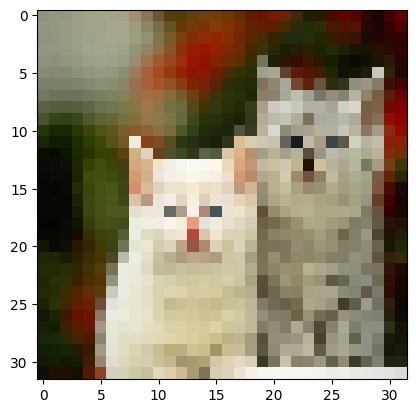

In [ ]:
from keras.utils import load_img
import matplotlib.pyplot as plt
img = load_img('meo1.jpg',target_size=(32,32))
plt.imshow(img)


In [ ]:
import numpy as np
from keras.utils.image_utils import img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 23ms/step


array([22])

In [ ]:
model.save('model_cifar100.h5')